In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
dataset = pd.read_csv (r'/Volumes/GoogleDrive/My Drive/Spring 2022 Semester 2 MSSM/Python/Alex Thesis/Master_Spreadsheet_ Machine Learning.csv')
#print (dataset)
dataset.tail()

,API,Formula_API,MW_API,LogP_API,AlogP_API,HBA_API,HBD_API,TPSA_API,AMR_API,nRB_API,...,Acidicpka4_Co,Basicpka1_Co,Basicpka2_Co,Basicpka3_Co,Basicpka4_Co,MeltingP_Co,Formation_Binary,Coformer,Formula_Co,Formation
537,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,0.00,0.0,0.0,0,230.0,1,4-(bromomethyl)benzoic acid,C₈H₇BrO₂,CC
538,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,0.00,0.0,0.0,0,214.5,1,4-hydroxybenzoic acid,C₇H₆O₃,CC
539,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,0.00,0.0,0.0,0,158.0,1,2-hydroxybenzoic acid/ Salicyclic acid,C₇H₆O₃,CC
540,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,2.69,0.0,0.0,0,188.5,1,4-aminobenzoic acid,C₇H₇NO₂,CC
541,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,0.00,0.0,0.0,0,141.0,1,3-nitrobenzoic acid,C₇H₅NO₄,CC


In [3]:
X = dataset[['MW_API','LogP_API','AlogP_API','HBA_API','HBD_API',
             
    'TPSA_API','AMR_API','nRB_API','nAtom_API','nAcidicGroup_API',
             
    'RC_API', 'nRigidB_API', 'nAromaticRings_API', 'nHB_API',
             
    'E_API', 'Eaq_API', 'relE_API', 'relEaq_API', 'EHOMO_API',
             
    'ELUMO_API', 'Dipole_API', 'SolvationE_API', 'Solubility_API',
             
    'Acidicpka1_API', 'Acidicpka2_API', 'Acidicpka3_API', 'Acidicpka4_API',
             
    'Basicpka1_API', 'Basicpka2_API', 'Basicpka3_API', 'Basicpka4_API',
             
    'MW_Co','LogP_Co', 'AlogP_Co', 'HBA_Co','HBD_Co', 'TPSA_Co',
             
    'AMR_Co', 'nRB_Co', 'nAtom_Co', 'nAcidicGroup_Co', 'RC_Co',
             
    'nRigidB_Co', 'nAromaticRing_Co', 'nHB_Co', 'E_Co', 'Eaq_Co',
             
    'relE_Co', 'relEaq_Co', 'EHOMO_Co', 'ELUMO_Co', 'Dipole_Co',
             
    'SolvationE_Co', 'Solubility_Co', 'Acidicpka1_Co', 'Acidicpka2_Co',
             
    'Acidicpka3_Co', 'Acidicpka4_Co', 'Basicpka1_Co', 'Basicpka2_Co', 'Basicpka3_Co', 'Basicpka4_Co']] 

Y = dataset['Formation_Binary']

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split


# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test


In [5]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8159509202453987


In [7]:
#Feature Importance

features_values = clf.feature_importances_

In [8]:
features_values

array([0.01498515, 0.01372867, 0.02430654, 0.0075665 , 0.00857683,
       0.01369736, 0.01368056, 0.01002455, 0.04022538, 0.00121138,
       0.01252109, 0.01452837, 0.01038096, 0.01545459, 0.01190239,
       0.01198092, 0.        , 0.        , 0.03812904, 0.01314515,
       0.02449742, 0.01337157, 0.02155632, 0.016646  , 0.00330918,
       0.        , 0.        , 0.07262169, 0.00753449, 0.0001332 ,
       0.        , 0.02670198, 0.02689951, 0.02221482, 0.02183586,
       0.00761726, 0.03343682, 0.03481658, 0.00842625, 0.02368352,
       0.00371986, 0.00755396, 0.02055441, 0.0073596 , 0.01413577,
       0.03389757, 0.03508579, 0.        , 0.        , 0.03859559,
       0.03400865, 0.02656168, 0.02833168, 0.02657328, 0.04571756,
       0.00946845, 0.00308127, 0.00060332, 0.01626449, 0.00713918,
       0.        , 0.        ])

In [9]:
features = ['MW_API','LogP_API','AlogP_API','HBA_API','HBD_API',
             
    'TPSA_API','AMR_API','nRB_API','nAtom_API','nAcidicGroups_API',
             
    'RC_API', 'nRigidB_API', 'nAromatic_rings_API', 'nHB_API',
             
    'E_API', 'Eaq_API', 'relE _API', 'relEaq_API', 'EHOMO_API',
             
    'ELUMO_API', 'Dipole_API', 'SolvationE_API', 'Solubility_API',
             
    'Acidicpka1_API', 'Acidicpka2_API', 'Acidicpka3_API', 'Acidicpka4_API',
             
    'Basicpka1_API', 'Basicpka2_API', 'Basicpka3_API', 'Basicpka4_API',
             
             
    'MW_Co','LogP_Co', 'AlogP_Co', 'HBA_Co','HBD_Co', 'TPSA_Co',
             
    'AMR_Co', 'nRB_Co', 'nAtom_Co', 'nAcidicGroups_Co', 'RC_Co',
             
    'nRigidB_Co', 'nAromaticRings_Co', 'nHB_Co', 'E_Co', 'Eaq_Co',
             
    'relE_Co', 'relEaq_Co', 'EHOMO_Co', 'ELUMO_Co', 'Dipole_Co',
             
    'SolvationE_Co', 'Solubility_Co', 'Acidicpka1_Co', 'Acidicpka2_Co',
             
    'Acidicpka3_Co', 'Acidicpka4_Co', 'Basicpka1_Co', 'Basicpka2_Co', 'Basicpka3_Co', 'Basicpka4_Co'] 

In [10]:
#Flaten 2D array into a 1D Array
features_values = features_values.flatten()

In [11]:
final_table = [['features'],['features_values']]

['MW_API', 'LogP_API', 'AlogP_API', 'HBA_API', 'HBD_API', 'TPSA_API', 'AMR_API', 'nRB_API', 'nAtom_API', 'nAcidicGroups_API', 'RC_API', 'nRigidB_API', 'nAromatic_rings_API', 'nHB_API', 'E_API', 'Eaq_API', 'relE _API', 'relEaq_API', 'EHOMO_API', 'ELUMO_API', 'Dipole_API', 'SolvationE_API', 'Solubility_API', 'Acidicpka1_API', 'Acidicpka2_API', 'Acidicpka3_API', 'Acidicpka4_API', 'Basicpka1_API', 'Basicpka2_API', 'Basicpka3_API', 'Basicpka4_API', 'MW_Co', 'LogP_Co', 'AlogP_Co', 'HBA_Co', 'HBD_Co', 'TPSA_Co', 'AMR_Co', 'nRB_Co', 'nAtom_Co', 'nAcidicGroups_Co', 'RC_Co', 'nRigidB_Co', 'nAromaticRings_Co', 'nHB_Co', 'E_Co', 'Eaq_Co', 'relE_Co', 'relEaq_Co', 'EHOMO_Co', 'ELUMO_Co', 'Dipole_Co', 'SolvationE_Co', 'Solubility_Co', 'Acidicpka1_Co', 'Acidicpka2_Co', 'Acidicpka3_Co', 'Acidicpka4_Co', 'Basicpka1_Co', 'Basicpka2_Co', 'Basicpka3_Co', 'Basicpka4_Co']
[0.01498515 0.01372867 0.02430654 0.0075665  0.00857683 0.01369736
 0.01368056 0.01002455 0.04022538 0.00121138 0.01252109 0.01452837
 0.0

<BarContainer object of 62 artists>

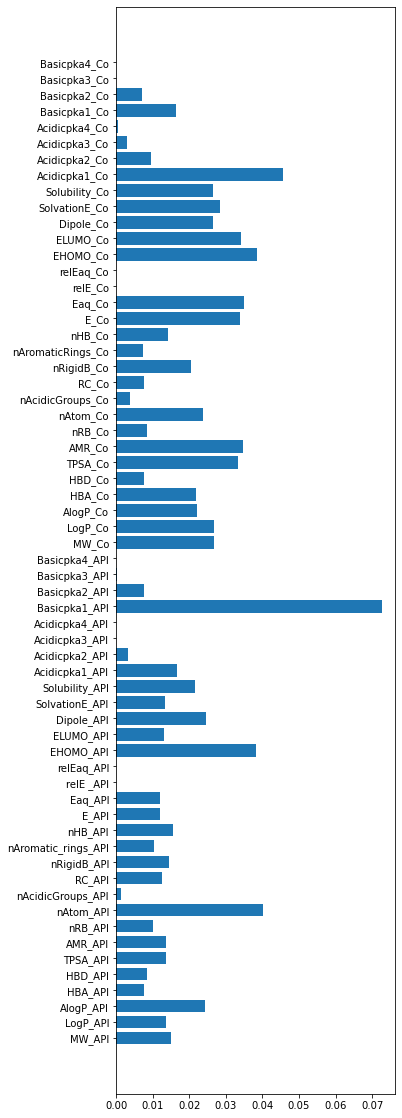

In [12]:
print(features)
print(features_values)

# Plot features and coeffficient weightings
plt.figure(figsize=(5, 20))
plt.barh(features,features_values)


#plt.savefig('Random_Features.png', dpi=600)

In [13]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

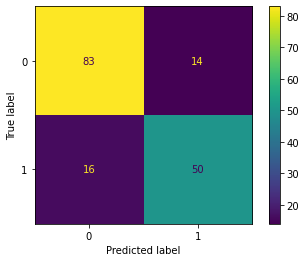

In [14]:
confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#plt.savefig('condusion_matrix.png', dpi=600)

In [15]:
#ROC Curves

r_probs = [0 for _ in range(len(Y_test))]
rf_probs = clf.predict_proba(X_test)


In [16]:
rf_probs = rf_probs[:, 1]

In [17]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)

In [18]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.872


In [19]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)

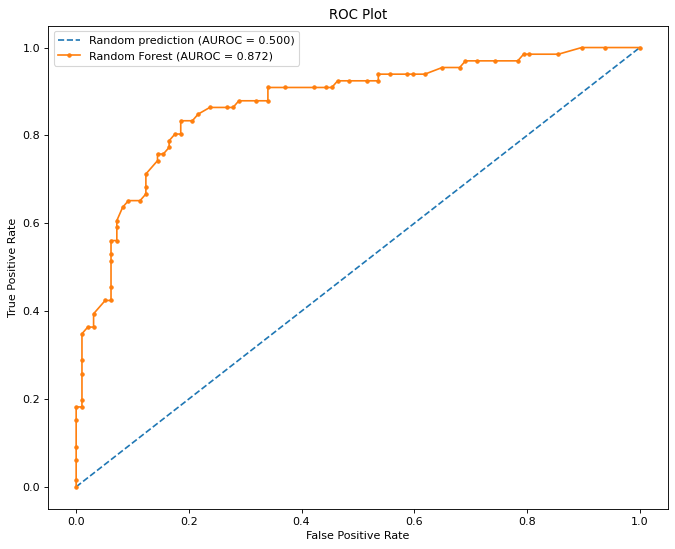

In [20]:
plt.figure(figsize=(10, 8), dpi=80)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

#plt.savefig('ROC_CoCrystal_Formation_Random_Forrest.png', dpi=600)